##Домашнее задание
Взять код градиентного спуска для линейной регрессии (с занятия) и обучить ее
Методом nesterov momentum
Методом rmsprop
Задание со звездочкой - доработать код логистической регрессии из первого занятия и обучить ее теми же методами для задачи классификации Ирисов (взять только два цветка - Iris Versicolor и Iris Virginica)

In [161]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from scipy.optimize import approx_fprime
import pandas as pd
import math
from sklearn import datasets
from decimal import Decimal, getcontext

In [162]:
#Dataset for Logistic regression
iris = datasets.load_iris()
y_log= iris.target
X_log = iris.data
index=[]
for i in range(len(y_log)):
    if y_log[i] == 0:
        index.append(i)
y_log = np.where(y_log == 1, 0, 1)
y_log = np.delete(y_log,index)
X_log = np.delete(X_log,index,0)

df = pd.DataFrame(X_log, columns = ['sepal length','sepal width','petal length','petal width'])
df["target"] = y_log
df.head()
df

,sepal length,sepal width,petal length,petal width,target
0,7.0,3.2,4.7,1.4,0
1,6.4,3.2,4.5,1.5,0
2,6.9,3.1,4.9,1.5,0
3,5.5,2.3,4.0,1.3,0
4,6.5,2.8,4.6,1.5,0
...,...,...,...,...,...
95,6.7,3.0,5.2,2.3,1
96,6.3,2.5,5.0,1.9,1
97,6.5,3.0,5.2,2.0,1
98,6.2,3.4,5.4,2.3,1


In [163]:
#Dataset for Linear regression

diabetes = datasets.load_diabetes()
y_lin = diabetes.target
X_lin = diabetes.data
df = pd.DataFrame(X_lin[:,0:7], columns = ['T1','T2','T3','T4','T5','T6','T7'])
df["target"] = y_lin
df.head()
df



,T1,T2,T3,T4,T5,T6,T7,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,135.0
...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,220.0


In [164]:
#Helper methods for logistic regression


def logist_model(x,T):
    res = 1/(1+math.exp((-1)*(T[0] + sum([T[j+1]*x[j] for j in range(len(x))]))))
    return res

def cost_function_log(X, y, T):
    total_cost=0
    for i in range(len(X)):
        total_cost += y[i]*math.log(logist_model(X[i],T)+(1.e-30)) + (1-y[i])*math.log(1-logist_model(X[i],T) + (1.e-30))
    return -total_cost

def der_theta0_log(X, y, T):
    total_cost = 0
    for i in range(len(X)):
        total_cost += logist_model(X[i],T) - y[i]
    return total_cost 

def der_thetaN_log(X, y, T, idx):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (logist_model(X[i],T) - y[i]) *X[i][idx]
    return total_cost / (len(X)) 

def gradient_log(X, y, T):
    grad = []
    grad.append(der_theta0_log(X, y, T))
    for j in range(1, len(T)):
        grad.append(der_thetaN_log(X, y, T, j-1))
    return np.asarray(grad)

In [165]:
#Help method for linier regression

def cost_function_lin(X, y, T):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (T[0] + sum([T[j+1]*X[i][j] for j in range(len(X[i]))])-y[i]  ) ** 2
    return total_cost / (2 * len(X))

def der_theta0_lin(X, y, T):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (T[0] + sum([T[j+1]*X[i][j] for j in range(len(X[i]))])-y[i] )
    return total_cost / (len(X)) 

def der_thetaN_lin(X, y, T, idx):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (T[0] + sum([T[j+1]*X[i][j] for j in range(len(X[i]))])-y[i] ) *X[i][idx]
    return total_cost / (len(X)) 

def gradient_lin(X, y, T):
    grad = []
    grad.append(der_theta0_lin(X, y, T))
    for j in range(1, len(T)):
        grad.append(der_thetaN_lin(X, y, T, j-1))
    return np.asarray(grad)

Nesterov Momentum
v_t = momentum* v_t{t-1} + step_size*grad( T - momentum* v_t{t-1} )
T = T{t-1} - v_t

In [166]:
def nesterov_alg(X, y, T, momentum, step_size, gradient_method, cost_method,EPOCHS):
    v_t = [0 for _ in range(len(T))]
    sol_eval =[]
    for it in range(EPOCHS):
        prT  = [T[i] - momentum*v_t[i] for i in range(len(T))]
        grT = gradient_method(X, y, prT)
        for i in range(len(T)):
            v_t[i]=momentum*v_t[i] + step_size*grT[i]
            T[i] = T[i]-v_t[i]
        sol_eval.append(cost_method(X, y, T))
    plt.title('Cost function changes')    
    plt.plot(sol_eval)
    plt.show()



RMSprop
<img src="form_1.png">
<img src="form_2.png">

In [167]:
# RMSprop algoritm
def rmsprop_alg(X, y, T, momentum, step_size, gradient_method, cost_method, EPOCHS):
    e = 10**(-8)
    S = [0 for _ in range(len(T))]
    sol_eval =[]
    for it in range(EPOCHS):
        grT = gradient_method(X, y, T)
        grT2 = [x**2 for x in grT]
        for i in range(len(T)):
            S[i]=momentum*S[i] + (1-momentum)*grT2[i]
            T[i] = T[i]-step_size* (grT[i]/(math.sqrt(S[i])+e))  
        sol_eval.append(cost_method(X, y, T))
   
    plt.title('Cost function changes')
    plt.plot(sol_eval)
    plt.show()



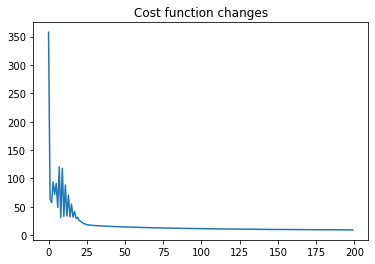

In [168]:
# Nesterov Momentum for logistic regression
T=(len(X_log[0])+1) * [1]  # initialize T vector of parameters wit 1 value
epo = 200
momentum = 0.9
step_size = 0.1
nesterov_alg(X_log, y_log, T, momentum, step_size, gradient_log, cost_function_log, epo)

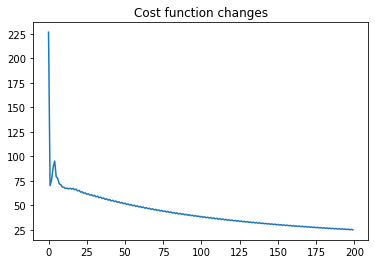

In [169]:
#  RMSprop for logistic regression
T=(len(X_log[0])+1) * [0]  # initialize T vector of parameters wit 1 value
epo = 200
momentum = 0.9
step_size = 0.1
rmsprop_alg(X_log, y_log, T, momentum, step_size, gradient_log, cost_function_log, epo)

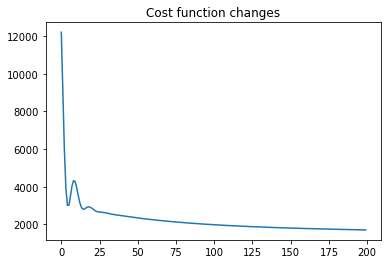

In [159]:
# Nesterov Momentum for linear regression
T=(len(X_lin[0])+1) * [1]  # initialize T vector of parameters wit 1 value
epo = 200
momentum = 0.9
step_size = 0.1
nesterov_alg(X_lin, y_lin, T, momentum, step_size, gradient_lin, cost_function_lin, epo)

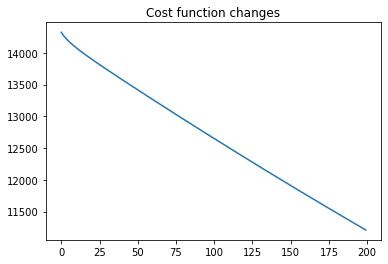

In [160]:
#  RMSprop for linear regression
T=(len(X_lin[0])+1) * [1]  # initialize T vector of parameters wit 1 value
epo = 200
momentum = 0.9
step_size = 0.1
rmsprop_alg(X_lin, y_lin, T, momentum, step_size, gradient_lin, cost_function_lin,epo)